In [1]:
from google.colab import files
uploaded = files.upload()  # Manually select your JSON files


Saving Streaming_History_Audio_2023-2024_3.json to Streaming_History_Audio_2023-2024_3.json


In [2]:
import json
import pandas as pd

all_data = []
for file_name in uploaded.keys():
    with open(file_name, 'r') as f:
        data = json.load(f)
        all_data.extend(data)

df = pd.DataFrame(all_data)
print(df.head())


                     ts                   username platform  ms_played  \
0  2023-11-22T22:39:33Z  raplyh72vy3zhrr00bmo31js2      ios      88000   
1  2023-11-22T22:40:46Z  raplyh72vy3zhrr00bmo31js2      ios      85333   
2  2023-11-22T22:42:09Z  raplyh72vy3zhrr00bmo31js2      ios      94981   
3  2023-11-22T22:43:34Z  raplyh72vy3zhrr00bmo31js2      ios      97175   
4  2023-11-22T22:44:56Z  raplyh72vy3zhrr00bmo31js2      ios      93483   

  conn_country ip_addr_decrypted user_agent_decrypted  \
0           TR     176.33.69.133              unknown   
1           TR     176.33.69.133              unknown   
2           TR     176.33.69.133              unknown   
3           TR     176.33.69.133              unknown   
4           TR     176.33.69.133              unknown   

                   master_metadata_track_name  \
0  Hair Dryer Sound 8 - Loopable Without Fade   
1            Hair Dryer Sounds for Sleep Pt.4   
2           Hair Dryer Sounds (Loopable) Pt.5   
3           Hair

In [3]:
print(df.isnull().sum())


ts                                       0
username                                 0
platform                                 0
ms_played                                0
conn_country                             0
ip_addr_decrypted                        0
user_agent_decrypted                  5346
master_metadata_track_name               0
master_metadata_album_artist_name        0
master_metadata_album_album_name         0
spotify_track_uri                        0
episode_name                         16786
episode_show_name                    16786
spotify_episode_uri                  16786
reason_start                             0
reason_end                               0
shuffle                                  0
skipped                                  0
offline                                  0
offline_timestamp                        0
incognito_mode                           0
dtype: int64


In [4]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16786 entries, 0 to 16785
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   ts                                 16786 non-null  object
 1   username                           16786 non-null  object
 2   platform                           16786 non-null  object
 3   ms_played                          16786 non-null  int64 
 4   conn_country                       16786 non-null  object
 5   ip_addr_decrypted                  16786 non-null  object
 6   user_agent_decrypted               11440 non-null  object
 7   master_metadata_track_name         16786 non-null  object
 8   master_metadata_album_artist_name  16786 non-null  object
 9   master_metadata_album_album_name   16786 non-null  object
 10  spotify_track_uri                  16786 non-null  object
 11  episode_name                       0 non-null      object
 12  epis

In [5]:
df_cleaned = df.dropna(subset=['master_metadata_track_name', 'master_metadata_album_artist_name', 'ts'])


In [6]:
df_cleaned['ts'] = pd.to_datetime(df_cleaned['ts'])


In [7]:
df_cleaned = df_cleaned[['ts', 'master_metadata_track_name', 'master_metadata_album_artist_name', 'ms_played', 'conn_country']]


<Axes: title={'center': 'Daily Listening Trends'}, xlabel='date'>

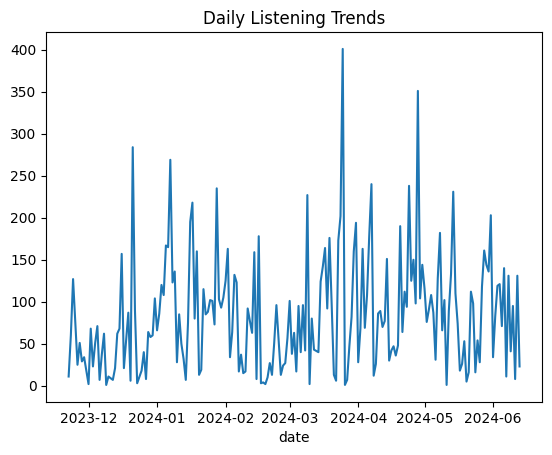

In [8]:
df_cleaned['date'] = df_cleaned['ts'].dt.date
daily_listening = df_cleaned.groupby('date').size()
daily_listening.plot(kind='line', title='Daily Listening Trends')


In [9]:
# Convert the timestamp column (assume it's named 'ts') to a date
df_cleaned['date'] = pd.to_datetime(df_cleaned['ts']).dt.date  # Extract date only

# Display a sample of the modified DataFrame
print(df_cleaned[['master_metadata_track_name', 'ts', 'date']].head())


                   master_metadata_track_name                        ts  \
0  Hair Dryer Sound 8 - Loopable Without Fade 2023-11-22 22:39:33+00:00   
1            Hair Dryer Sounds for Sleep Pt.4 2023-11-22 22:40:46+00:00   
2           Hair Dryer Sounds (Loopable) Pt.5 2023-11-22 22:42:09+00:00   
3           Hair Dryer Sounds (Loopable) Pt.1 2023-11-22 22:43:34+00:00   
4            Hair Dryer Sounds for Sleep Pt.8 2023-11-22 22:44:56+00:00   

         date  
0  2023-11-22  
1  2023-11-22  
2  2023-11-22  
3  2023-11-22  
4  2023-11-22  


In [10]:
from google.colab import files
import pandas as pd

# Upload the weather CSV file
uploaded = files.upload()  # Manually select your weather CSV file

# Load the uploaded CSV into a Pandas DataFrame
for file_name in uploaded.keys():
    weather_df = pd.read_csv(file_name)

# Rename the column to 'date' if needed
weather_df.rename(columns={'datetime': 'date'}, inplace=True)

# Ensure the date column is properly formatted
weather_df['date'] = pd.to_datetime(weather_df['date']).dt.date

# Display the first few rows of the DataFrame
print(weather_df.head())


Saving istanbul 2023-11-13 to 2024-06-13.csv to istanbul 2023-11-13 to 2024-06-13.csv
       name        date  tempmax  tempmin  temp  feelslikemax  feelslikemin  \
0  istanbul  2023-11-13     16.9     13.2  15.1          16.9          13.2   
1  istanbul  2023-11-14     16.7      8.1  13.0          16.7           8.1   
2  istanbul  2023-11-15     20.2     14.3  17.2          20.2          14.3   
3  istanbul  2023-11-16     19.1     11.6  13.8          19.1          11.6   
4  istanbul  2023-11-17     15.8     12.1  14.0          15.8          12.1   

   feelslike   dew  humidity  ...  solarenergy  uvindex  severerisk  \
0       15.1  13.4      89.7  ...          1.8        1         NaN   
1       13.0   9.0      77.6  ...          9.4        5         NaN   
2       17.2  11.3      68.6  ...          9.5        5         NaN   
3       13.8  10.2      79.5  ...          2.8        2         NaN   
4       14.0   8.6      70.5  ...          4.2        2         NaN   

            

In [11]:
# Merge Spotify data with weather data on the 'date' column
merged_df = pd.merge(df_cleaned, weather_df, on='date', how='left')

# Display a sample of the merged DataFrame
print(merged_df[['master_metadata_track_name', 'date', 'conditions']].head())


                   master_metadata_track_name        date  \
0  Hair Dryer Sound 8 - Loopable Without Fade  2023-11-22   
1            Hair Dryer Sounds for Sleep Pt.4  2023-11-22   
2           Hair Dryer Sounds (Loopable) Pt.5  2023-11-22   
3           Hair Dryer Sounds (Loopable) Pt.1  2023-11-22   
4            Hair Dryer Sounds for Sleep Pt.8  2023-11-22   

               conditions  
0  Rain, Partially cloudy  
1  Rain, Partially cloudy  
2  Rain, Partially cloudy  
3  Rain, Partially cloudy  
4  Rain, Partially cloudy  


In [12]:
merged_df.rename(columns={'conditions': 'weather_category'}, inplace=True)


In [13]:
# Group songs by weather category
grouped_songs = merged_df.groupby('weather_category')['master_metadata_track_name'].apply(list)

# Display grouped songs by weather category
print("Songs grouped by weather category:")
print(grouped_songs)


Songs grouped by weather category:
weather_category
Clear                           [Hair Dryer Sound Pt.5, Hair Dryer Sound 8 - L...
Overcast                        [Green Noise For A Quiet Mind (1 Hour), Green ...
Partially cloudy                [Sakinleştim, Sakinleştim, Alaturka, Güneş, Dö...
Rain                            [Green Noise For A Quiet Mind (1 Hour), Rememb...
Rain, Overcast                  [Hair Dryer Sounds (Loopable) Pt.3, Hair Dryer...
Rain, Partially cloudy          [Hair Dryer Sound 8 - Loopable Without Fade, H...
Snow, Rain, Partially cloudy    [Hair Dryer Sound 8 - Loopable Without Fade, H...
Name: master_metadata_track_name, dtype: object


In [14]:
# Save the categorized data to a CSV
merged_df.to_csv("spotify_songs_with_weather_categories.csv", index=False)

print("Data saved to 'spotify_songs_with_weather_categories.csv'")


Data saved to 'spotify_songs_with_weather_categories.csv'


In [15]:
# Count the occurrences of each song in each weather category
ranked_songs = (
    merged_df.groupby(['weather_category', 'master_metadata_track_name'])
    .size()
    .reset_index(name='play_count')
)

# Sort by weather category and play count (descending)
ranked_songs = ranked_songs.sort_values(by=['weather_category', 'play_count'], ascending=[True, False])

# Display the ranked songs
print(ranked_songs.head())



    weather_category                  master_metadata_track_name  play_count
376            Clear  Hair Dryer Sound 8 - Loopable Without Fade          70
346            Clear       Green Noise For A Quiet Mind (1 Hour)          52
98             Clear                                    Bambaşka          37
333            Clear                              Geçmiyor Zaman          35
857            Clear                                     ZAR ZOR          32


In [16]:
# Count the occurrences of each song in each weather category
ranked_songs = (
    merged_df.groupby(['weather_category', 'master_metadata_track_name'])
    .size()
    .reset_index(name='play_count')
)

# Sort by weather category and play count (descending)
ranked_songs = ranked_songs.sort_values(by=['weather_category', 'play_count'], ascending=[True, False])

# Display the ranked songs
print(ranked_songs.head())



    weather_category                  master_metadata_track_name  play_count
376            Clear  Hair Dryer Sound 8 - Loopable Without Fade          70
346            Clear       Green Noise For A Quiet Mind (1 Hour)          52
98             Clear                                    Bambaşka          37
333            Clear                              Geçmiyor Zaman          35
857            Clear                                     ZAR ZOR          32


In [17]:
# Select the top 10 songs for each weather category
top_songs_per_category = ranked_songs.groupby('weather_category').head(10)

# Pivot the table to create playlists
playlists_table = (
    top_songs_per_category.groupby('weather_category')['master_metadata_track_name']
    .apply(list)
    .reset_index(name='Top Playlist')
)

# Display the playlists as a table
print(playlists_table)


               weather_category  \
0                         Clear   
1                      Overcast   
2              Partially cloudy   
3                          Rain   
4                Rain, Overcast   
5        Rain, Partially cloudy   
6  Snow, Rain, Partially cloudy   

                                        Top Playlist  
0  [Hair Dryer Sound 8 - Loopable Without Fade, G...  
1            [Green Noise For A Quiet Mind (1 Hour)]  
2  [Hair Dryer Sound 8 - Loopable Without Fade, G...  
3  [Leyla İle Mecnun: Duygusal Tema, Beklediğim G...  
4  [Hair Dryer Sound 8 - Loopable Without Fade, C...  
5  [Hair Dryer Sound 8 - Loopable Without Fade, G...  
6  [Hair Dryer Sound 8 - Loopable Without Fade, H...  


In [18]:
# Save playlists to a CSV file
playlists_table.to_csv("ranked_weather_playlists.csv", index=False)

print("Ranked playlists saved to 'ranked_weather_playlists.csv'")


Ranked playlists saved to 'ranked_weather_playlists.csv'


In [24]:
from IPython.display import display

# Display the ranked songs table
print("Ranked Songs by Weather:")
display(ranked_songs)  # Displays all songs ranked by frequency


Ranked Songs by Weather:


,weather_category,master_metadata_track_name,play_count
376,Clear,Hair Dryer Sound 8 - Loopable Without Fade,70
346,Clear,Green Noise For A Quiet Mind (1 Hour),52
98,Clear,Bambaşka,37
333,Clear,Geçmiyor Zaman,35
857,Clear,ZAR ZOR,32
...,...,...,...
5627,"Snow, Rain, Partially cloudy",Hair Dryer Sounds (Loopable) Pt.5,1
5628,"Snow, Rain, Partially cloudy",Hair Dryer Sounds (Loopable) Pt.6,1
5629,"Snow, Rain, Partially cloudy",Hair Dryer Sounds (Loopable) Pt.7,1
5630,"Snow, Rain, Partially cloudy",Hair Dryer Sounds (Loopable) Pt.8,1


In [25]:
# Create a dictionary where keys are weather categories and values are lists of songs
category_song_dict = {
    row['weather_category']: row['Top Playlist']
    for _, row in playlists_table.iterrows()
}

# Convert the dictionary into a DataFrame with categories as rows and songs as columns
category_song_df = pd.DataFrame.from_dict(category_song_dict, orient='index').transpose()

# Display the horizontal table
print("Playlists with Songs in a Horizontal Table Format:")
print(category_song_df)


Playlists with Songs in a Horizontal Table Format:
                                        Clear  \
0  Hair Dryer Sound 8 - Loopable Without Fade   
1       Green Noise For A Quiet Mind (1 Hour)   
2                                    Bambaşka   
3                              Geçmiyor Zaman   
4                                     ZAR ZOR   
5                                       Zaman   
6                                   Düşünürüm   
7                        Gözlerime Bak (Live)   
8                                       Yalan   
9                                       Anlar   

                                Overcast  \
0  Green Noise For A Quiet Mind (1 Hour)   
1                                   None   
2                                   None   
3                                   None   
4                                   None   
5                                   None   
6                                   None   
7                                   None   
8            

In [21]:
import pandas as pd
from scipy.stats import chi2_contingency

# Step 1: Merge Spotify Data with Weather Data
# Ensure 'date' column exists in both DataFrames and is of datetime type
df_cleaned['date'] = pd.to_datetime(df_cleaned['date']).dt.date
weather_df['date'] = pd.to_datetime(weather_df['date']).dt.date

# Merge Spotify and Weather data on the 'date' column
merged_df = pd.merge(
    df_cleaned,  # Spotify DataFrame
    weather_df,  # Weather DataFrame
    on='date',  # Merge on the 'date' column
    how='left'  # Left join to keep all Spotify records
)

# Ensure the weather category column is properly named
if 'weather_category' not in merged_df.columns:
    merged_df['weather_category'] = merged_df['conditions']

# Step 2: Calculate Daily Listening Counts per Weather Category
daily_listening = merged_df.groupby(['date', 'weather_category']).size().reset_index(name='listening_count')

# Step 3: Create a Contingency Table
contingency_table = pd.pivot_table(
    daily_listening,
    values='listening_count',
    index='weather_category',  # Rows: Weather categories
    columns='date',  # Columns: Dates
    aggfunc='sum',
    fill_value=0
)

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Step 4: Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Step 5: Output Results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"Degrees of Freedom: {dof}")
print(f"P-Value: {p}")

# Step 6: Hypothesis Testing Conclusion
alpha = 0.05  # Significance level
if p < alpha:
    print("\nResult: Reject the null hypothesis (H0). There is a relationship between weather and music preference.")
else:
    print("\nResult: Fail to reject the null hypothesis (H0). No evidence of a relationship between weather and music preference.")


Contingency Table:
date                          2023-11-22  2023-11-23  2023-11-24  2023-11-26  \
weather_category                                                               
Clear                                  0           0           0           0   
Overcast                               0           0           0           0   
Partially cloudy                       0           0           0           0   
Rain                                   0           0           0           0   
Rain, Overcast                         0           0           0           0   
Rain, Partially cloudy                11          60         127          25   
Snow, Rain, Partially cloudy           0           0           0           0   

date                          2023-11-27  2023-11-28  2023-11-29  2023-12-01  \
weather_category                                                               
Clear                                  0           0           0           0   
Overcast            